# Basketball Terminologies

Lineup:
The term "lineup" can also be used more broadly to refer to the current group of five players on the court, which can change throughout the game as substitutions are made.

Positions:
The starting lineup typically comprises five positions: Point Guard (PG), Shooting Guard (SG), Small Forward (SF), Power Forward (PF), and Center (C).

Plus/Minus:
Plus/Minus is the difference in points scored vs. points allowed for a particular lineup. This is divided by the number of minutes that a given lineup played together. So if Players, 1, 2, 3, 4, and 5 play together for a total of 20 minutes, score 60 points, and give up 40 points; they would have a Plus/Minus per Minute of 1 ((60-40)/20 = 1). This means they outscore their opponent by 1 point every minute of play.

Objectives

    Determine who are the top lineups in terms of Plus/Minus per Minute
    Gain insight into how different teams manage their lineups

Periods in NBA Game
An NBA game is divided into four 12-minute periods (quarters), totaling 48 minutes of regulation play. 
Here's a more detailed explanation:
Regulation Time:
An NBA game consists of four 12-minute quarters, resulting in a total of 48 minutes of playing time. 
Overtime:
If the score is tied at the end of the fourth quarter, the game goes into overtime, which is a 5-minute period. 
Stoppages:
The game clock stops for various reasons, including fouls, timeouts, and free throws, which can significantly extend the actual game time. 
Halftime:
There is a 15-minute halftime break between the second and third quarters. 
Game Duration:
Due to stoppages, halftime, and commercial breaks, an NBA game typically lasts around 2 to 2.5 hours. 



# Data Dictionary


    - game_id: This uniquely identifies each game.
    a1 - h5: These columns identify each individual in the game for the away team (a1..a5) and the home team (h1...h5)
    play_length: This will tell us how long a lineup is on the floor together
    team: This tells us which team scored and will also be used to assign lineups to teams
    player: This identifies the player who scored and will be needed to identify which lineup scored vs. gave up the points
    points: Represents the points scored for each play


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
pbp = pd.read_csv('[12-22-2020]-[07-20-2021]-combined-stats.csv')
pbp.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description
0,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN
1,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,NaN
2,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,bad pass,NaN,NaN,bad pass,NaN,NaN,NaN,NaN,NaN,Jordan Out of Bounds - Bad Pass Turnover Turno...
3,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,s.foul,NaN,NaN,shooting,NaN,NaN,NaN,NaN,NaN,Irving S.FOUL (P1.T1) (S.Twardoski)
4,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,made,NaN,free throw 1/2,NaN,NaN,NaN,NaN,NaN,Curry Free Throw 1 of 2 (1 PTS)


# code for producing the plus/minus data frame

In [ ]:



# Limit to scoring rows only
print(pbp.shape)
gamedata = pbp[pbp['points'].notna()]
gamedata = gamedata[gamedata['points'] >= 1]
print(gamedata.shape)
gamedata.head()

(541348, 44)
(136191, 44)


,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description
4,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,made,NaN,free throw 1/2,NaN,NaN,NaN,NaN,NaN,Curry Free Throw 1 of 2 (1 PTS)
5,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,made,NaN,free throw 2/2,NaN,NaN,NaN,NaN,NaN,Curry Free Throw 2 of 2 (2 PTS)
6,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,made,NaN,jump shot,22.0,-2.0,220.0,24.8,67.0,Irving 22' Pullup Jump Shot (2 PTS) (Durant 1 ...
7,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,made,NaN,cutting dunk shot,1.0,9.0,-2.0,24.1,4.8,Wiseman 1' Cutting Dunk Shot (2 PTS) (Wiggins ...
8,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,made,NaN,3pt pullup jump shot,26.0,-20.0,258.0,23.0,63.2,Durant 26' 3PT Pullup Jump Shot (3 PTS) (Harri...


In [13]:
# Create list of games and teams
GameTeamList = gamedata[['game_id', 'team']].drop_duplicates()
print(GameTeamList.shape)
GameTeamList.head()

(2342, 2)


,game_id,team
4,22000001,GSW
6,22000001,BKN
521,22000002,LAC
532,22000002,LAL
1020,22000003,BOS


In [14]:
# Get home and away teams
GameTeamList1 = GameTeamList.sort_values(['game_id', 'team']).drop_duplicates(subset=['game_id'])
print(GameTeamList1.head())
GameTeamList2 = GameTeamList.sort_values(['game_id', 'team'], ascending=[True, False]).drop_duplicates(subset=['game_id'])  # When ascending is set to [True, False], it indicates that the first column specified in by should be sorted in ascending order, while the second column should be sorted in descending order. 
GameTeamList2.head()

       game_id team
6     22000001  BKN
521   22000002  LAC
1020  22000003  BOS
1517  22000004  DAL
6758  22000005  MIA


,game_id,team
4,22000001,GSW
532,22000002,LAL
1021,22000003,MIL
1491,22000004,PHX
6759,22000005,NOP


In [17]:
# Add sorted lineups
gamedata['Away_Lineup'] = gamedata.iloc[:, 3:8].apply(lambda x: ','.join(sorted(x.dropna().astype(str))), axis=1)
print(gamedata['Away_Lineup'].head())
gamedata['Home_Lineup'] = gamedata.iloc[:, 8:13].apply(lambda x: ','.join(sorted(x.dropna().astype(str))), axis=1)
gamedata['Home_Lineup'].head()

4    Andrew Wiggins,Eric Paschall,James Wiseman,Kel...
5    Andrew Wiggins,Eric Paschall,James Wiseman,Kel...
6    Andrew Wiggins,Eric Paschall,James Wiseman,Kel...
7    Andrew Wiggins,Eric Paschall,James Wiseman,Kel...
8    Andrew Wiggins,Eric Paschall,James Wiseman,Kel...
Name: Away_Lineup, dtype: object


4    DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...
5    DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...
6    DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...
7    DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...
8    DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...
Name: Home_Lineup, dtype: object

In [20]:
# Assign home and away teams
gamedata['HomeTm'] = np.where(gamedata[['h1', 'h2', 'h3', 'h4', 'h5']].eq(gamedata['player'], axis=0).any(axis=1), gamedata['team'], np.nan)    # .eq() is used for element wise comparison in a df
print(gamedata['HomeTm'].head())
gamedata['AwayTm'] = np.where(gamedata[['a1', 'a2', 'a3', 'a4', 'a5']].eq(gamedata['player'], axis=0).any(axis=1), gamedata['team'], np.nan)
gamedata['AwayTm'].head()

4    NaN
5    NaN
6    BKN
7    NaN
8    BKN
Name: HomeTm, dtype: object


4    GSW
5    GSW
6    NaN
7    GSW
8    NaN
Name: AwayTm, dtype: object

In [21]:
# Calculate plus/minus values
gamedata['Home_PMV'] = np.where(gamedata['HomeTm'].isna(), -gamedata['points'], gamedata['points'])
print(gamedata['Home_PMV'].head())
gamedata['Away_PMV'] = np.where(gamedata['AwayTm'].isna(), -gamedata['points'], gamedata['points'])
gamedata['Away_PMV'].head()

4   -1.0
5   -1.0
6    2.0
7   -2.0
8    3.0
Name: Home_PMV, dtype: float64


4    1.0
5    1.0
6   -2.0
7    2.0
8   -3.0
Name: Away_PMV, dtype: float64

In [22]:
# Merge game team lists
gamedata = gamedata.merge(GameTeamList1, on='game_id', how='left').merge(GameTeamList2, on='game_id', how='left', suffixes=('_home', '_away'))
gamedata.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,converted_y,description,Away_Lineup,Home_Lineup,HomeTm,AwayTm,Home_PMV,Away_PMV,team_y,team
0,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,Curry Free Throw 1 of 2 (1 PTS),"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",NaN,GSW,-1.0,1.0,BKN,GSW
1,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,NaN,Curry Free Throw 2 of 2 (2 PTS),"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",NaN,GSW,-1.0,1.0,BKN,GSW
2,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,67.0,Irving 22' Pullup Jump Shot (2 PTS) (Durant 1 ...,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,NaN,2.0,-2.0,BKN,GSW
3,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,4.8,Wiseman 1' Cutting Dunk Shot (2 PTS) (Wiggins ...,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",NaN,GSW,-2.0,2.0,BKN,GSW
4,22000001,2020-21 Regular Season,2020-12-22,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,...,63.2,Durant 26' 3PT Pullup Jump Shot (3 PTS) (Harri...,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,NaN,3.0,-3.0,BKN,GSW


In [24]:
gamedata.columns

Index(['game_id', 'data_set', 'date', 'a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2',
       'h3', 'h4', 'h5', 'period', 'away_score', 'home_score',
       'remaining_time', 'elapsed', 'play_length', 'play_id', 'team_x',
       'event_type', 'assist', 'away', 'home', 'block', 'entered', 'left',
       'num', 'opponent', 'outof', 'player', 'points', 'possession', 'reason',
       'result', 'steal', 'type', 'shot_distance', 'original_x', 'original_y',
       'converted_x', 'converted_y', 'description', 'Away_Lineup',
       'Home_Lineup', 'HomeTm', 'AwayTm', 'Home_PMV', 'Away_PMV', 'team_y',
       'team'],
      dtype='object')

In [23]:
# Assign home/away teams
gamedata['isHomeTm'] = np.where(gamedata['HomeTm'].isna() & (gamedata['AwayTm'] == gamedata['team_away']), gamedata['team'],
                                np.where(gamedata['HomeTm'].isna() & (gamedata['AwayTm'] == gamedata['team']), gamedata['team_away'], gamedata['HomeTm']))
print(gamedata['isHomeTm'].head())

gamedata['isAwayTm'] = np.where(gamedata['AwayTm'].isna() & (gamedata['HomeTm'] == gamedata['team_away']), gamedata['team'],
                                np.where(gamedata['AwayTm'].isna() & (gamedata['HomeTm'] == gamedata['team']), gamedata['team_away'], gamedata['AwayTm']))
gamedata['isAwayTm'].head()


KeyError: 'team_away'

# Start here

In [44]:
# Limit to scoring rows only
gamedata = pbp[pbp['points'].notna()]
gamedata = gamedata[gamedata['points'] >= 1]

# Create list of games and teams
GameTeamList = gamedata[['game_id', 'team']].drop_duplicates()

# Get home and away teams
GameTeamList1 = GameTeamList.sort_values(['game_id', 'team']).drop_duplicates(subset=['game_id'])
GameTeamList2 = GameTeamList.sort_values(['game_id', 'team'], ascending=[True, False]).drop_duplicates(subset=['game_id'])

# Add sorted lineups
gamedata['Away_Lineup'] = gamedata.iloc[:, 3:8].apply(lambda x: ','.join(sorted(x.dropna().astype(str))), axis=1)
gamedata['Home_Lineup'] = gamedata.iloc[:, 8:13].apply(lambda x: ','.join(sorted(x.dropna().astype(str))), axis=1)

# Assign home and away teams
gamedata['HomeTm'] = np.where(gamedata[['h1', 'h2', 'h3', 'h4', 'h5']].eq(gamedata['player'], axis=0).any(axis=1), gamedata['team'], np.nan)
gamedata['AwayTm'] = np.where(gamedata[['a1', 'a2', 'a3', 'a4', 'a5']].eq(gamedata['player'], axis=0).any(axis=1), gamedata['team'], np.nan)

# Calculate plus/minus values
gamedata['Home_PMV'] = np.where(gamedata['HomeTm'].isna(), -gamedata['points'], gamedata['points'])
gamedata['Away_PMV'] = np.where(gamedata['AwayTm'].isna(), -gamedata['points'], gamedata['points'])

# Merge game team lists
gamedata = gamedata.merge(GameTeamList1, on='game_id', how='left', suffixes=('_home', '_away')).merge(GameTeamList2, on='game_id', how='left')

# Assign home/away teams
gamedata['isHomeTm'] = np.where(gamedata['HomeTm'].isna() & (gamedata['AwayTm'] == gamedata['team_away']), gamedata['team'],
                                np.where(gamedata['HomeTm'].isna() & (gamedata['AwayTm'] == gamedata['team']), gamedata['team_away'], gamedata['HomeTm']))
gamedata['isAwayTm'] = np.where(gamedata['AwayTm'].isna() & (gamedata['HomeTm'] == gamedata['team_away']), gamedata['team'],
                                np.where(gamedata['AwayTm'].isna() & (gamedata['HomeTm'] == gamedata['team']), gamedata['team_away'], gamedata['AwayTm']))


In [45]:
# Create tidy dataframe
home = gamedata[['game_id', 'Home_Lineup', 'isHomeTm', 'Home_PMV']].rename(columns={'Home_Lineup': 'Lineup', 'isHomeTm': 'Team', 'Home_PMV': 'plusminus'})
away = gamedata[['game_id', 'Away_Lineup', 'isAwayTm', 'Away_PMV']].rename(columns={'Away_Lineup': 'Lineup', 'isAwayTm': 'Team', 'Away_PMV': 'plusminus'})
tidy = pd.concat([home, away], ignore_index=True)

In [46]:
tidy

,game_id,Lineup,Team,plusminus
0,22000001,"DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,-1.0
1,22000001,"DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,-1.0
2,22000001,"DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,2.0
3,22000001,"DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,-2.0
4,22000001,"DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I...",BKN,3.0
...,...,...,...,...
272377,42000406,"Chris Paul,Deandre Ayton,Devin Booker,Jae Crow...",PHX,-2.0
272378,42000406,"Chris Paul,Deandre Ayton,Devin Booker,Jae Crow...",PHX,-1.0
272379,42000406,"Chris Paul,Deandre Ayton,Devin Booker,Jae Crow...",PHX,-1.0
272380,42000406,"Chris Paul,Deandre Ayton,Devin Booker,Jae Crow...",PHX,2.0


In [47]:
# Summarize plus/minus
pm_data = tidy.groupby(['Team', 'Lineup']).agg(PlusMinus=('plusminus', 'sum'), GP=('game_id', pd.Series.nunique))
pm_data['PerGame'] = pm_data['PlusMinus'] / pm_data['GP']
pm_data = pm_data.reset_index()

In [48]:
pm_data

,Team,Lineup,PlusMinus,GP,PerGame
0,ATL,"Bogdan Bogdanovic,Brandon Goodwin,Bruno Fernan...",-2.0,1,-2.0
1,ATL,"Bogdan Bogdanovic,Brandon Goodwin,Bruno Fernan...",-15.0,3,-5.0
2,ATL,"Bogdan Bogdanovic,Brandon Goodwin,Bruno Fernan...",-5.0,1,-5.0
3,ATL,"Bogdan Bogdanovic,Brandon Goodwin,Cam Reddish,...",-5.0,1,-5.0
4,ATL,"Bogdan Bogdanovic,Brandon Goodwin,Cam Reddish,...",0.0,1,0.0
...,...,...,...,...,...
14502,WAS,"Ish Smith,Jerome Robinson,Raul Neto,Robin Lope...",-5.0,1,-5.0
14503,WAS,"Ish Smith,Jordan Bell,Raul Neto,Robin Lopez,Ru...",2.0,1,2.0
14504,WAS,"Ish Smith,Raul Neto,Robin Lopez,Rui Hachimura,...",3.0,2,1.5
14505,WAS,"Ish Smith,Raul Neto,Robin Lopez,Russell Westbr...",-5.0,2,-2.5


# Step 1 of the plan is complete. We now have a dataframe called "pm_data" with Team, Lineup, Plus/Minus, GP (games played), and PerGame (plus/minus per game). In the next step, we will create the dataframe with minutes played data for each lineup.

In [49]:
# Process minutes data
mpdata = pbp.iloc[:, [0] + list(range(3, 13)) + [18]]
mpdata = mpdata[~mpdata['play_length'].isin(['00:-12:00', '00:-5:00'])]
mpdata['Away_Lineup'] = mpdata.iloc[:, 1:6].apply(lambda x: ','.join(sorted(x.dropna().astype(str))), axis=1)
mpdata['Home_Lineup'] = mpdata.iloc[:, 6:11].apply(lambda x: ','.join(sorted(x.dropna().astype(str))), axis=1)
mpdata.head()

,game_id,a1,a2,a3,a4,a5,h1,h2,h3,h4,h5,play_length,Away_Lineup,Home_Lineup
0,22000001,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,Kevin Durant,Joe Harris,Spencer Dinwiddie,0:00:00,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I..."
1,22000001,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,Kevin Durant,Joe Harris,Spencer Dinwiddie,0:00:00,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I..."
2,22000001,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,Kevin Durant,Joe Harris,Spencer Dinwiddie,0:00:10,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I..."
3,22000001,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,Kevin Durant,Joe Harris,Spencer Dinwiddie,0:00:12,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I..."
4,22000001,Stephen Curry,James Wiseman,Andrew Wiggins,Kelly Oubre Jr.,Eric Paschall,DeAndre Jordan,Kyrie Irving,Kevin Durant,Joe Harris,Spencer Dinwiddie,0:00:00,"Andrew Wiggins,Eric Paschall,James Wiseman,Kel...","DeAndre Jordan,Joe Harris,Kevin Durant,Kyrie I..."


In [50]:
# Convert time to minutes
mpdata['Minutes'] = mpdata['play_length'].apply(lambda x: sum(int(t) * 60 ** i for i, t in enumerate(reversed(x.split(':')))))

# Summarize total minutes
Totmin = mpdata.groupby('Away_Lineup').agg(MinTot=('Minutes', 'sum')).reset_index()
Totmin

,Away_Lineup,MinTot
0,"Aaron Gordon,Al-Farouq Aminu,Chasson Randle,Ev...",775
1,"Aaron Gordon,Al-Farouq Aminu,Chuma Okeke,Dwayn...",245
2,"Aaron Gordon,Al-Farouq Aminu,Chuma Okeke,Evan ...",315
3,"Aaron Gordon,Al-Farouq Aminu,Dwayne Bacon,Mich...",738
4,"Aaron Gordon,Al-Farouq Aminu,Evan Fournier,Jam...",242
...,...,...
13521,"Otto Porter Jr.,Patrick Williams,Thaddeus Youn...",194
13522,"Otto Porter Jr.,Patrick Williams,Thaddeus Youn...",0
13523,"Otto Porter Jr.,Patrick Williams,Tomas Satoran...",469
13524,"Patrick Beverley,Patrick Patterson,Paul George...",0


In [51]:
# Merge plus/minus and minutes
PMbyMin = pm_data.merge(Totmin, left_on='Lineup', right_on='Away_Lineup', how='left').drop(columns=['Away_Lineup'])
PMbyMin['PMperMin'] = PMbyMin['PlusMinus'] / PMbyMin['MinTot']
PMbyMin = PMbyMin.sort_values(by='PMperMin', ascending=False)
PMbyMin = PMbyMin[(PMbyMin['MinTot'] >= 48) & (PMbyMin['GP'] >= 1)]

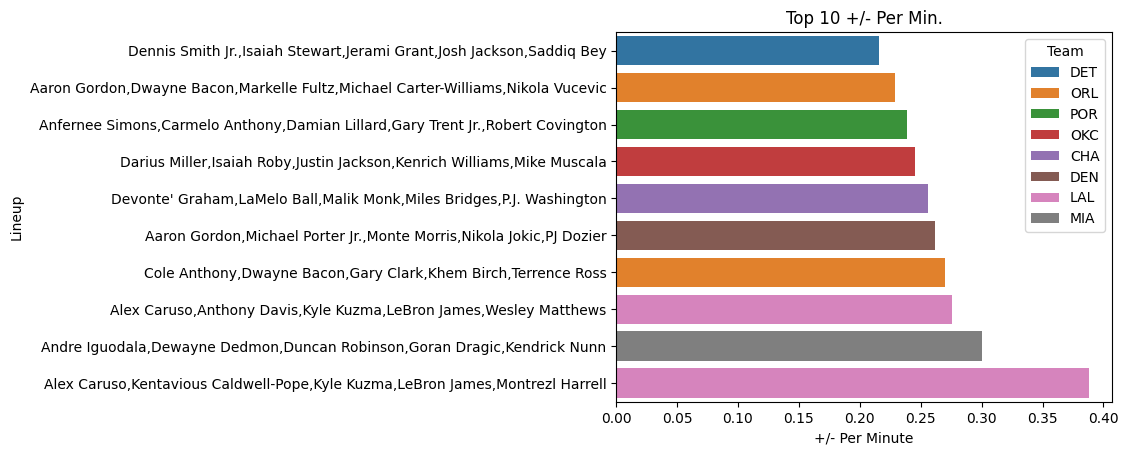

In [52]:
# Visualization
Top10 = PMbyMin.head(10).sort_values(by='PMperMin')
sns.barplot(data=Top10, y='Lineup', x='PMperMin', hue='Team')
plt.title('Top 10 +/- Per Min.')
plt.xlabel('+/- Per Minute')
plt.ylabel('Lineup')
plt.show()

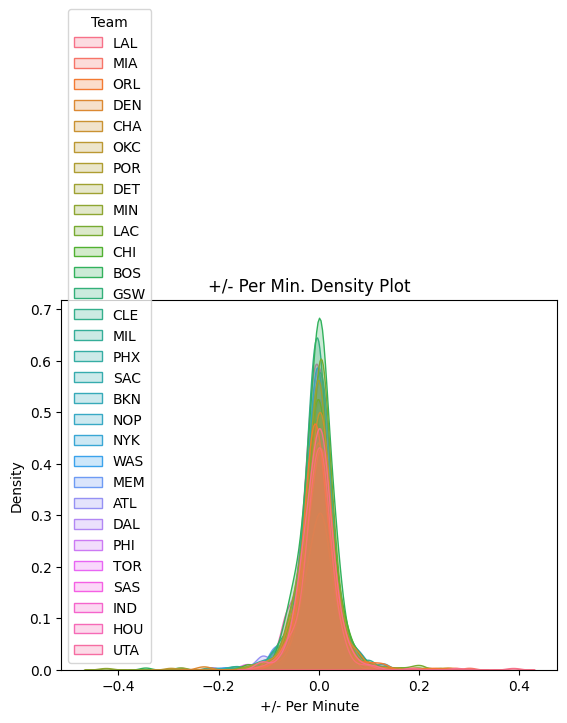

In [53]:
# Density plot
sns.kdeplot(data=PMbyMin, x='PMperMin', hue='Team', fill=True)
plt.title('+/- Per Min. Density Plot')
plt.xlabel('+/- Per Minute')
plt.show()



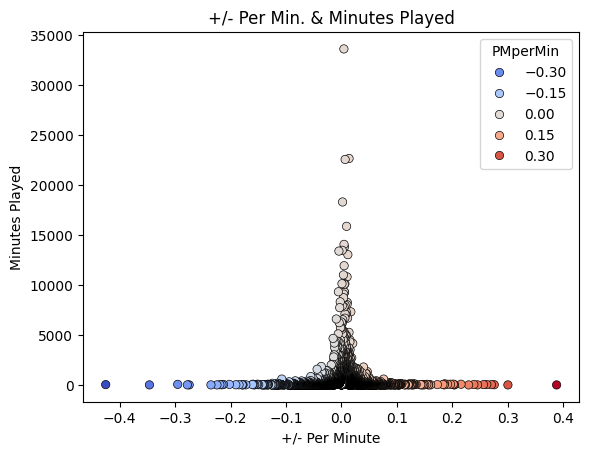

In [54]:
# Scatter plot
sns.scatterplot(data=PMbyMin, x='PMperMin', y='MinTot', hue='PMperMin', palette='coolwarm', edgecolor='black')
plt.title('+/- Per Min. & Minutes Played')
plt.xlabel('+/- Per Minute')
plt.ylabel('Minutes Played')
plt.show()